## Visualizing our work

Most of the analyses and work done in this report has been to perform unsupervised techniques to extract information from our data. As a result, many conclusions are in the form of document vector matrices, containing locations of each company filing in some n-dimensional space or its membership probability in m topics/industries. To accomplish this, we've devised a simple function that utilizes principle components analysis (PCA) to reduce our dimensions, condensing information into 2 and 3 dimensions for easy representation. Choosing to reduce to 10 dimensions (or less depending on the application) is simply arbitrary. We select the top 2-3 dimensions for representation, and (if available) use it's industry name to color code them.

The code can be found [here](https://github.com/richardye101/ubineer_nlp_research/blob/5a16caf65a0d2d21e8f377bd8b5f0d6b2435ad84/content/std_func.py#L20-L62).

An example you will see later on of both 2D and 3D representations of a tf-idf matrix (the very first topic):

plotted figure


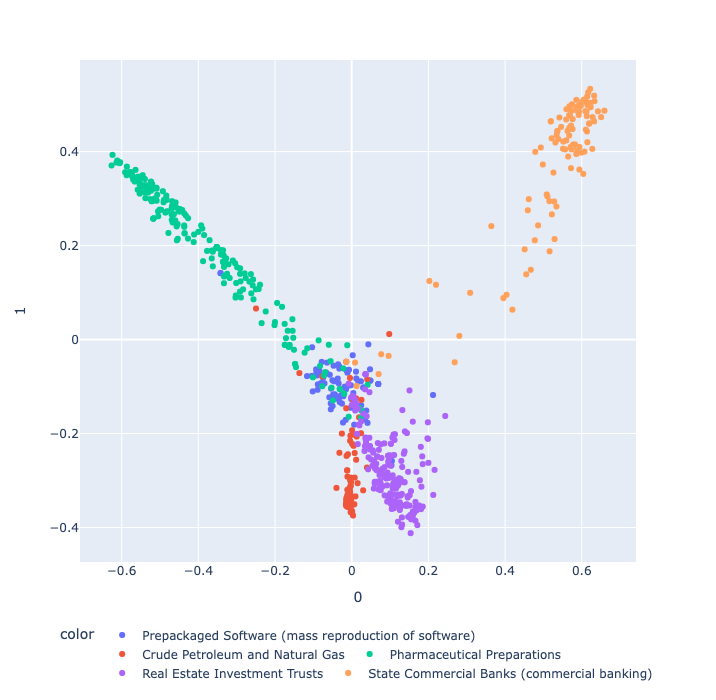

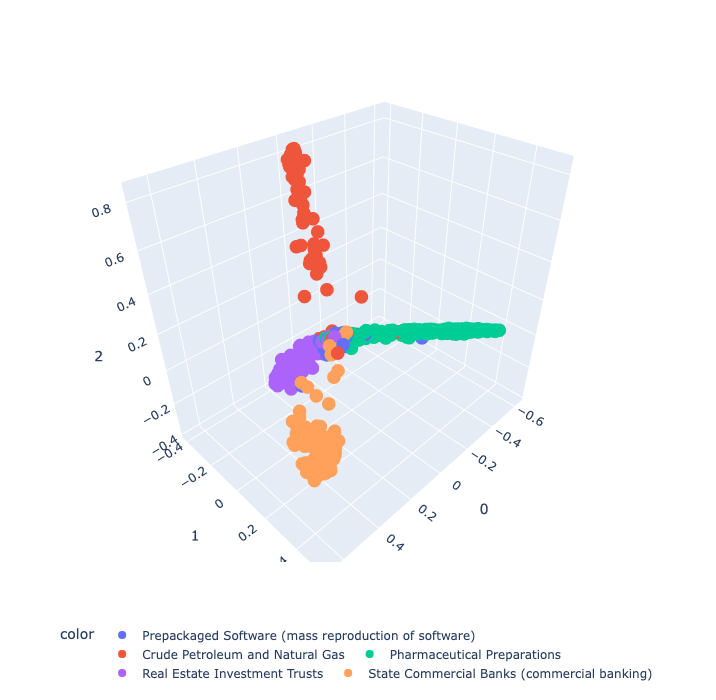

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

df = pd.read_csv("../data/preprocessed.csv")
pipe = Pipeline([('count', CountVectorizer(ngram_range = (2,4),
                                           stop_words = 'english', max_features = 600)),
                  ('tfidf', TfidfTransformer())]).fit(df["coDescription_stopwords"])
tfidf =  pd.DataFrame(pipe.transform(df["coDescription_stopwords"]).toarray())
plot = std_func.pca_visualize_2d(tfidf, df.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot)